# Rag Simple Financial Analisys (fundamental Analysis)

### Fundamental vs. Technical Analysis: An Overview
There are two main schools of thought when evaluating investments and making trading decisions: fundamental analysis and technical analysis. While both aim to predict future price movements and identify profitable opportunities, they take very different approaches. Fundamental analysis examines an asset's intrinsic value by examining economic and financial factors, while technical analysis focuses solely on price action and chart patterns. 


### Company's balance sheet
A company's balance sheet, also known as a "statement of financial position," reveals the firm's assets, liabilities, and owners' equity (net worth) at a specific point in time. The balance sheet, together with the income statement and cash flow statement, make up the cornerstone of any company's financial statements.

### What Is an Income Statement?
An income statement is a financial report used by a business. It tracks the company's revenue, expenses, gains, and losses during a set period. Also known as the profit and loss (P&L) statement or the statement of revenue and expense, it provides valuable insights into a company’s operations, the efficiency of its management, underperforming sectors, and its performance relative to industry peers.
### Cash Flow Statement

A cash flow statement is a financial statement that provides aggregate data regarding all cash inflows that a company receives from its ongoing operations and external investment sources. It also includes all cash outflows that pay for business activities and investments during a given period. 


#### LINKS
- https://www.investopedia.com/ask/answers/difference-between-fundamental-and-technical-analysis/
- https://uk.finance.yahoo.com/
- https://ranaroussi.github.io/yfinance/reference/index.html
- https://site.financialmodelingprep.com/
- https://pypi.org/project/fmpsdk/
- https://www.morningstar.com/business/brands/data-analytics/products/direct/features/python-package
- https://www.quantconnect.com/docs/v2/cloud-platform/api-reference


In [1]:

import time
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

#streamlit
import streamlit as st

#rag library
from langchain.chains import RetrievalQA
from langchain.docstore.document import Document

from langchain_core.prompts import ChatPromptTemplate
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.storage import InMemoryStore

import pandas as pd
import json

from langchain_qdrant import QdrantVectorStore
from qdrant_client import QdrantClient
from qdrant_client.http.models import Distance, VectorParams

In [2]:
from dotenv import load_dotenv, dotenv_values
import os
import pandas as pd

env_path = os.path.join( ".env")
load_dotenv(env_path)

True

In [3]:
ROOT_DIR = os.getcwd()

with open(os.path.join(ROOT_DIR, "complete-tube-421007-208a4862c992.json",)) as source:
    info = json.load(source)

In [4]:
from google.oauth2 import service_account
import vertexai

In [5]:
GEMINI_API_KEY = os.getenv("GEMINI-API-KEY")
vertex_credentials = service_account.Credentials.from_service_account_info(
                info
            )

In [6]:
key = os.getenv("GEMINI_API_KEY") #API KEY
embeddings = GoogleGenerativeAIEmbeddings(google_api_key=key, model="models/embedding-001",credentials=vertex_credentials)
#define LLM
llm = ChatGoogleGenerativeAI(google_api_key=key, temperature=0.01, model="gemini-1.5-pro",credentials=vertex_credentials)

In [7]:
def table_transform(df):
  table = df
  table = table.transpose()
  col = table.iloc[0].str.strip()
  table = table[1:]
  table.columns = col
  table.replace('-- ', 0, inplace=True)
  table = table.replace(',', '', regex=True).astype(float)
  table = table.iloc[::-1]

  return table

def format_numbers(x, pos):
    sign = '-' if x < 0 else ''
    x = abs(x)

    if x >= 1e12:
        return f'{sign}{x*1e-12:.1f}T'
    elif x >= 1e9:
        return f'{sign}{x*1e-9:.1f}B'
    elif x >= 1e6:
        return f'{sign}{x*1e-6:.1f}M'
    else:
        return f'{sign}{x:.0f}'

In [8]:
import yfinance as yf
dat = yf.Ticker("MSFT")

In [9]:
description = dat.info.get('longBusinessSummary')

In [18]:
dat.get_balance_sheet().index

Index(['OrdinarySharesNumber', 'ShareIssued', 'NetDebt', 'TotalDebt',
       'TangibleBookValue', 'InvestedCapital', 'WorkingCapital',
       'NetTangibleAssets', 'CapitalLeaseObligations', 'CommonStockEquity',
       'TotalCapitalization', 'TotalEquityGrossMinorityInterest',
       'StockholdersEquity', 'GainsLossesNotAffectingRetainedEarnings',
       'OtherEquityAdjustments', 'RetainedEarnings', 'CapitalStock',
       'CommonStock', 'TotalLiabilitiesNetMinorityInterest',
       'TotalNonCurrentLiabilitiesNetMinorityInterest',
       'OtherNonCurrentLiabilities', 'TradeandOtherPayablesNonCurrent',
       'NonCurrentDeferredLiabilities', 'NonCurrentDeferredRevenue',
       'NonCurrentDeferredTaxesLiabilities',
       'LongTermDebtAndCapitalLeaseObligation',
       'LongTermCapitalLeaseObligation', 'LongTermDebt', 'CurrentLiabilities',
       'OtherCurrentLiabilities', 'CurrentDeferredLiabilities',
       'CurrentDeferredRevenue', 'CurrentDebtAndCapitalLeaseObligation',
       'Current

In [19]:
#dat.get_info()

In [10]:
description

'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power apps, and power automate; and on-premises ERP and CRM applications. The Intelligent Cloud segment offers server products and cloud services, such as azure and other cloud services; SQL and windows server, visual studio, system center, and related client access licenses, as well as nuance and GitHub; and enterprise services including enterprise support services, industry solutions, and nuance professional services. The Mor

In [21]:
import typing
import fmpsdk
apikey = os.environ.get("FMP")

# Company Valuation Methods
symbol: str = "MSFT"
print(f"Company Profile: {fmpsdk.company_profile(apikey=apikey, symbol=symbol)}")

Company Profile: [{'symbol': 'MSFT', 'price': 410.54, 'beta': 0.904, 'volAvg': 21902640, 'mktCap': 3051946149200, 'lastDiv': 3.08, 'range': '385.58-468.35', 'changes': 1.5, 'companyName': 'Microsoft Corporation', 'currency': 'USD', 'cik': '0000789019', 'isin': 'US5949181045', 'cusip': '594918104', 'exchange': 'NASDAQ Global Select', 'exchangeShortName': 'NASDAQ', 'industry': 'Software - Infrastructure', 'website': 'https://www.microsoft.com', 'description': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for org

In [22]:
msft = fmpsdk.company_profile(apikey=apikey, symbol=symbol)

In [23]:
msft[0].keys()

dict_keys(['symbol', 'price', 'beta', 'volAvg', 'mktCap', 'lastDiv', 'range', 'changes', 'companyName', 'currency', 'cik', 'isin', 'cusip', 'exchange', 'exchangeShortName', 'industry', 'website', 'description', 'ceo', 'sector', 'country', 'fullTimeEmployees', 'phone', 'address', 'city', 'state', 'zip', 'dcfDiff', 'dcf', 'image', 'ipoDate', 'defaultImage', 'isEtf', 'isActivelyTrading', 'isAdr', 'isFund'])

In [90]:
msft[0]['description']

'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. The Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related Client Access Licenses; GitHub that provides a collaboration platform and code hosting service for developers; Nuance provides healthcare and enterprise AI solutions; and Azure, a cloud platform. It also offers enterprise support, Microsoft consulting, and nuance professional services to assist customers in developing, d

In [25]:
#fmpsdk.balance_sheet_statement(apikey=apikey, symbol=symbol)

In [26]:
import pandas as pd

In [27]:
info = pd.DataFrame(dat.get_info())
type(info)

pandas.core.frame.DataFrame

In [28]:
#dat.get_news()

In [29]:
desc = dat.get_info()
type(desc)

dict

In [30]:
IS = dat.income_stmt

In [31]:
IS_final = IS.transpose()

In [32]:
zero_percentage = (IS_final == 0).sum(axis=1) / IS_final.shape[0]
threshold = 0.7
IS_final = IS_final.loc[zero_percentage < threshold]
IS_final

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Operating Expense,Research And Development,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2024-06-30,-99918000.0,0.182,133558000000.0,-549000000.0,-549000000.0,88136000000.0,22287000000.0,74114000000.0,133009000000.0,110722000000.0,...,61575000000.0,29510000000.0,32065000000.0,24456000000.0,7609000000.0,7609000000.0,171008000000.0,74114000000.0,245122000000.0,245122000000.0
2023-06-30,-2850000.0,0.19,105155000000.0,-15000000.0,-15000000.0,72361000000.0,13861000000.0,65863000000.0,105140000000.0,91279000000.0,...,57529000000.0,27195000000.0,30334000000.0,22759000000.0,7575000000.0,7575000000.0,146052000000.0,65863000000.0,211915000000.0,211915000000.0
2022-06-30,43754000.0,0.131,99905000000.0,334000000.0,334000000.0,72738000000.0,14460000000.0,62650000000.0,100239000000.0,85779000000.0,...,52237000000.0,24512000000.0,27725000000.0,21825000000.0,5900000000.0,5900000000.0,135620000000.0,62650000000.0,198270000000.0,198270000000.0
2021-06-30,180160797.164637,0.138266,83831000000.0,1303000000.0,1303000000.0,61271000000.0,11686000000.0,52232000000.0,85134000000.0,73448000000.0,...,45940000000.0,20716000000.0,25224000000.0,20117000000.0,5107000000.0,5107000000.0,115856000000.0,52232000000.0,168088000000.0,168088000000.0


In [33]:
BS = dat.balance_sheet

In [34]:
BS_annual = BS.transpose()

In [35]:
if IS_final.index[-1]=='TTM ':
  BS_quarterly = table_transform(BS[1])
  last_row = BS_quarterly.tail(1)
  BS_annual = pd.concat([BS_annual, last_row])
zero_percentage = (BS_annual == 0).sum(axis=1) / BS_annual.shape[1]
threshold = 0.7
BS_final = BS_annual.loc[zero_percentage < threshold]
BS_final

,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,Common Stock Equity,...,Raw Materials,Receivables,Accounts Receivable,Allowance For Doubtful Accounts Receivable,Gross Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents,Cash Equivalents,Cash Financial
2024-06-30,7434138859.0,7434138859.0,33315000000.0,67127000000.0,121660000000.0,320107000000.0,34448000000.0,121660000000.0,15497000000.0,268477000000.0,...,394000000.0,56924000000.0,56924000000.0,-830000000.0,57754000000.0,75531000000.0,57216000000.0,18315000000.0,6744000000.0,11571000000.0
2023-06-30,7432000000.0,7432000000.0,12533000000.0,59965000000.0,128971000000.0,253460000000.0,80108000000.0,128971000000.0,12728000000.0,206223000000.0,...,709000000.0,48688000000.0,48688000000.0,-650000000.0,49338000000.0,111256000000.0,76552000000.0,34704000000.0,26226000000.0,8478000000.0
2022-06-30,7464000000.0,7464000000.0,35850000000.0,61270000000.0,87720000000.0,216323000000.0,74602000000.0,87720000000.0,11489000000.0,166542000000.0,...,1144000000.0,44261000000.0,44261000000.0,-633000000.0,44894000000.0,104749000000.0,90818000000.0,13931000000.0,5673000000.0,8258000000.0
2021-06-30,7519000000.0,7519000000.0,43922000000.0,67775000000.0,84477000000.0,200134000000.0,95749000000.0,84477000000.0,9629000000.0,141988000000.0,...,1190000000.0,38043000000.0,38043000000.0,-751000000.0,38794000000.0,130256000000.0,116032000000.0,14224000000.0,6952000000.0,7272000000.0


In [36]:
CF = dat.cash_flow.iloc[:, :-1]

In [37]:
CF_final = CF.transpose()
# zero_percentage = (CF_final == 0).sum(axis=1) / CF_final.shape[0]
# threshold = 0.5
# CF_final = CF_final.loc[zero_percentage < threshold]
CF_final

,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,End Cash Position,Beginning Cash Position,Effect Of Exchange Rate Changes,Changes In Cash,...,Unrealized Gain Loss On Investment Securities,Asset Impairment Charge,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Depreciation,Operating Gains Losses,Gain Loss On Investment Securities,Net Income From Continuing Operations
2024-06-30,74071000000.0,-17254000000.0,-29070000000.0,29645000000.0,2002000000.0,-44477000000.0,18315000000.0,34704000000.0,-210000000.0,-16179000000.0,...,-146000000.0,206000000.0,-4738000000.0,-4738000000.0,22287000000.0,22287000000.0,22287000000.0,245000000.0,245000000.0,88136000000.0
2023-06-30,59475000000.0,-22245000000.0,-2750000000.0,0.0,1866000000.0,-28107000000.0,34704000000.0,13931000000.0,-194000000.0,20967000000.0,...,-303000000.0,30000000.0,-6059000000.0,-6059000000.0,13861000000.0,13861000000.0,13861000000.0,469000000.0,469000000.0,72361000000.0
2022-06-30,65149000000.0,-32696000000.0,-9023000000.0,0.0,1841000000.0,-23886000000.0,13931000000.0,14224000000.0,-141000000.0,-152000000.0,...,-509000000.0,101000000.0,-5702000000.0,-5702000000.0,14460000000.0,14460000000.0,14460000000.0,-1000000.0,-1000000.0,72738000000.0
2021-06-30,56118000000.0,-27385000000.0,-3750000000.0,NaN,1693000000.0,-20622000000.0,14224000000.0,13576000000.0,-29000000.0,677000000.0,...,-1057000000.0,13000000.0,-150000000.0,-150000000.0,11686000000.0,11686000000.0,11686000000.0,-205000000.0,-205000000.0,61271000000.0


In [38]:
npm = IS_final['Net Income Common Stockholders']/IS_final['Total Revenue']*100
net_profit = IS_final['Net Income Common Stockholders']
revenue = IS_final['Total Revenue']
ebitda = IS_final['EBITDA']/IS_final['Total Revenue']*100
npm ,ebitda

(2024-06-30    35.955973
 2023-06-30    34.146238
 2022-06-30    36.686337
 2021-06-30     36.45174
 dtype: object,
 2024-06-30    54.262367
 2023-06-30    49.614232
 2022-06-30    50.556816
 2021-06-30     50.64847
 dtype: object)

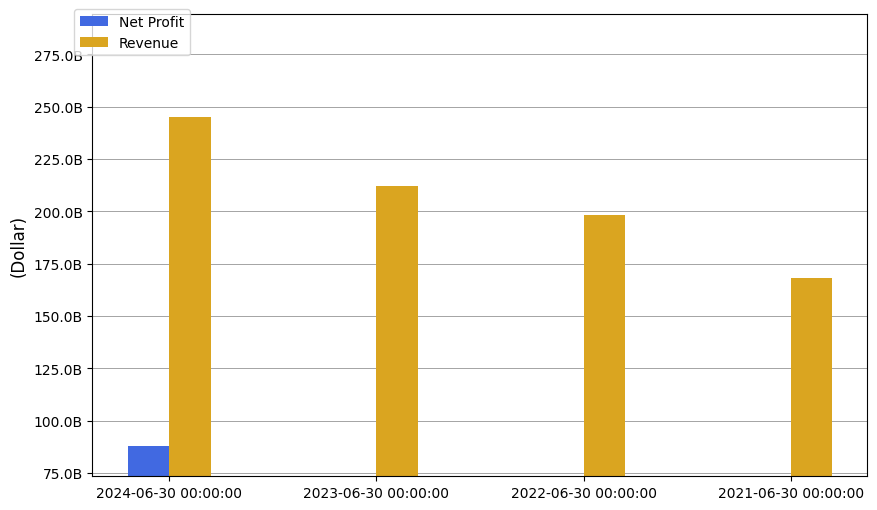

In [39]:
#plot 1
categories = IS_final.index
x = np.arange(len(categories))
width = 0.2  # Width of the bars

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Net Profit and Revenue as bar charts
ax1.bar(x - width/2, net_profit, width=width, label='Net Profit', color='royalblue', align='center')
ax1.bar(x + width/2, revenue, width=width, label='Revenue', color='goldenrod', align='center')

# Setting X-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.set_ylabel('(Dollar)', fontsize=12)

# Apply the custom formatter to the Y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(format_numbers))


min_value = min(min(net_profit), min(revenue))
max_value = max(max(net_profit), max(revenue))
ax1.set_ylim([min_value*1.2, max_value*1.2])


# Adding legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

ax1.grid(True, axis='y', linestyle='-', linewidth=0.5, color='gray')
ax1.set_axisbelow(True)

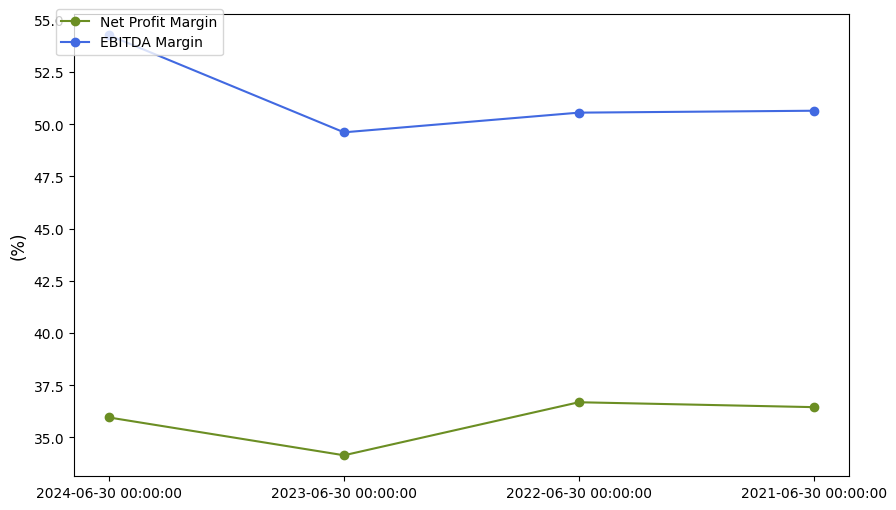

In [40]:
#plot 2
categories = IS_final.index
x = np.arange(len(categories))

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Net Profit and Revenue as bar charts
ax1.plot(x, npm, color='olivedrab', marker='o', label='Net Profit Margin')
ax1.plot(x, ebitda, color='royalblue', marker='o', label='EBITDA Margin')

#set limit
# min_val = min(min(npm), min(ebitda))
# max_val = max(max(npm), max(ebitda))
# ax1.set_ylim([min_val*1.2, max_val*1.2])

# Setting X-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.set_ylabel('(%)', fontsize=12)

# Adding legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

In [41]:
BS_final.columns

Index(['Ordinary Shares Number', 'Share Issued', 'Net Debt', 'Total Debt',
       'Tangible Book Value', 'Invested Capital', 'Working Capital',
       'Net Tangible Assets', 'Capital Lease Obligations',
       'Common Stock Equity', 'Total Capitalization',
       'Total Equity Gross Minority Interest', 'Stockholders Equity',
       'Gains Losses Not Affecting Retained Earnings',
       'Other Equity Adjustments', 'Retained Earnings', 'Capital Stock',
       'Common Stock', 'Total Liabilities Net Minority Interest',
       'Total Non Current Liabilities Net Minority Interest',
       'Other Non Current Liabilities', 'Tradeand Other Payables Non Current',
       'Non Current Deferred Liabilities', 'Non Current Deferred Revenue',
       'Non Current Deferred Taxes Liabilities',
       'Long Term Debt And Capital Lease Obligation',
       'Long Term Capital Lease Obligation', 'Long Term Debt',
       'Current Liabilities', 'Other Current Liabilities',
       'Current Deferred Liabilities',

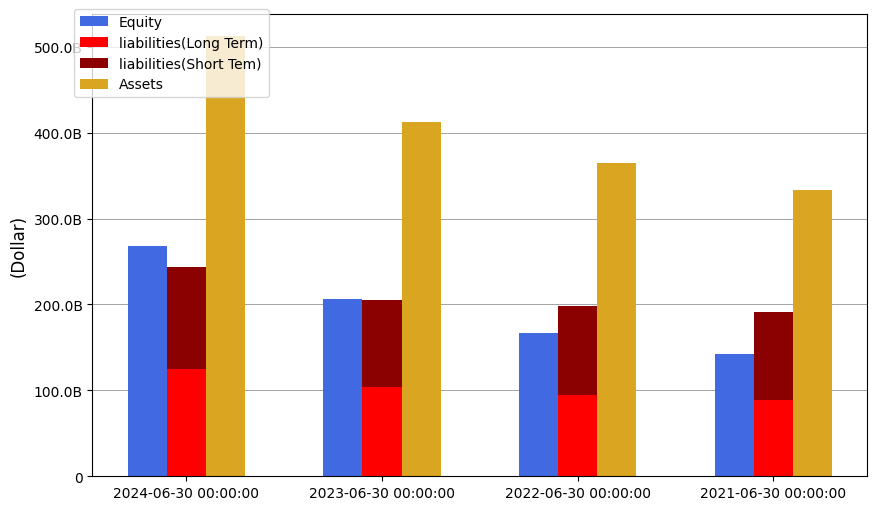

In [42]:
#Balance sheets
liabilities_long = BS_final['Current Liabilities']
liabilities_short = BS_final['Total Non Current Liabilities Net Minority Interest']
equity = BS_final['Total Equity Gross Minority Interest']
assets = equity + liabilities_long + liabilities_short
non_currect_assets = BS_final['Total Non Current Assets']
DER = (liabilities_long + liabilities_short)/equity*100

#plot 3
categories = BS_final.index
x = np.arange(len(categories))
width = 0.2  # Width of the bars

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Net Profit and Revenue as bar charts
ax1.bar(x - width, equity, width=width, label='Equity', color='royalblue', align='center')
ax1.bar(x, liabilities_long, width=width, label='liabilities(Long Term)', color='red', align='center')
ax1.bar(x, liabilities_short, width=width, label='liabilities(Short Tem)', color='darkred', align='center', bottom=liabilities_long)
ax1.bar(x + width, assets, width=width, label='Assets', color='goldenrod', align='center')

# Setting X-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.set_ylabel('(Dollar)', fontsize=12)

# Apply the custom formatter to the Y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(format_numbers))

# Adding legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

ax1.grid(True, axis='y', linestyle='-', linewidth=0.5, color='gray')
ax1.set_axisbelow(True)

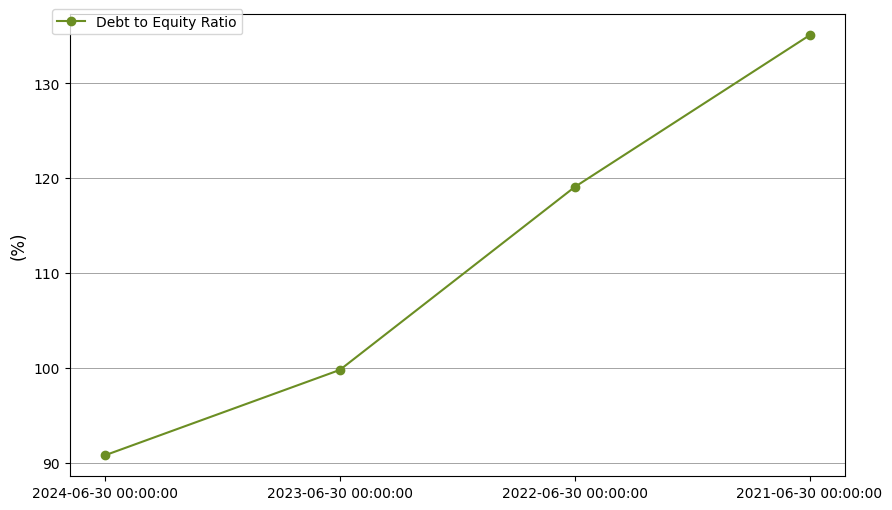

In [43]:
#plot 4
categories = BS_final.index
x = np.arange(len(categories))

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Net Profit and Revenue as bar charts
ax1.plot(x, DER, color='olivedrab', marker='o', label='Debt to Equity Ratio')

# Setting X-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.set_ylabel('(%)', fontsize=12)

# Adding legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

ax1.grid(True, axis='y', linestyle='-', linewidth=0.5, color='gray')
ax1.set_axisbelow(True)

In [44]:
CF_final.columns

Index(['Free Cash Flow', 'Repurchase Of Capital Stock', 'Repayment Of Debt',
       'Issuance Of Debt', 'Issuance Of Capital Stock', 'Capital Expenditure',
       'End Cash Position', 'Beginning Cash Position',
       'Effect Of Exchange Rate Changes', 'Changes In Cash',
       'Financing Cash Flow', 'Cash Flow From Continuing Financing Activities',
       'Net Other Financing Charges', 'Cash Dividends Paid',
       'Common Stock Dividend Paid', 'Net Common Stock Issuance',
       'Common Stock Payments', 'Common Stock Issuance',
       'Net Issuance Payments Of Debt', 'Net Short Term Debt Issuance',
       'Short Term Debt Payments', 'Short Term Debt Issuance',
       'Net Long Term Debt Issuance', 'Long Term Debt Payments',
       'Long Term Debt Issuance', 'Investing Cash Flow',
       'Cash Flow From Continuing Investing Activities',
       'Net Other Investing Changes', 'Net Investment Purchase And Sale',
       'Sale Of Investment', 'Purchase Of Investment',
       'Net Business 

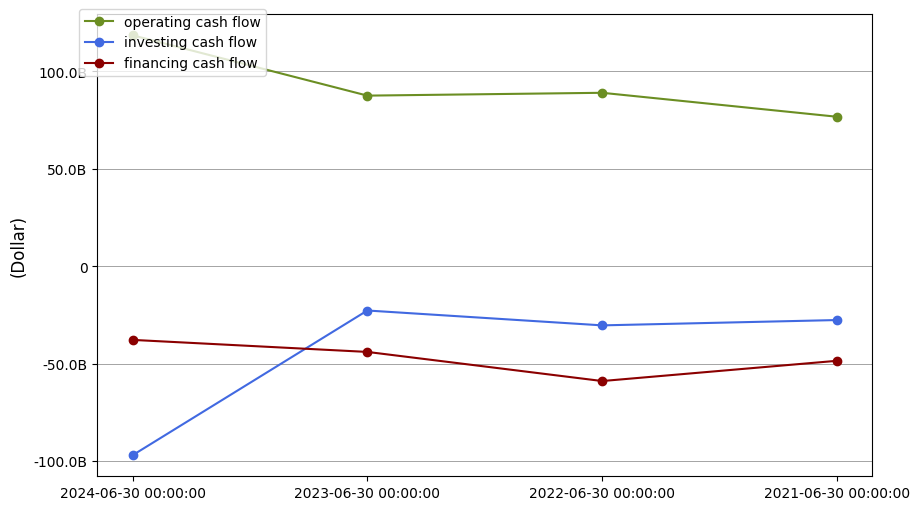

In [45]:
#Cash Flow
operating = CF_final['Cash Flow From Continuing Operating Activities']
investing = CF_final['Investing Cash Flow']
financing = CF_final['Financing Cash Flow']
beginning_cash = CF_final['Beginning Cash Position']
cash_reserve = beginning_cash + operating + investing + financing
end_cash = CF_final['End Cash Position']

#plot 5
categories = CF_final.index
x = np.arange(len(categories))

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Net Profit and Revenue as bar charts
ax1.plot(x, operating, color='olivedrab', marker='o', label='operating cash flow')
ax1.plot(x, investing, color='royalblue', marker='o', label='investing cash flow')
ax1.plot(x, financing, color='darkred', marker='o', label='financing cash flow')

# Setting X-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.set_ylabel('(Dollar)', fontsize=12)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(format_numbers))

# Adding legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

ax1.grid(True, axis='y', linestyle='-', linewidth=0.5, color='gray')
ax1.set_axisbelow(True)

In [49]:
json.dumps(desc)

'{"address1": "One Microsoft Way", "city": "Redmond", "state": "WA", "zip": "98052-6399", "country": "United States", "phone": "425 882 8080", "website": "https://www.microsoft.com", "industry": "Software - Infrastructure", "industryKey": "software-infrastructure", "industryDisp": "Software - Infrastructure", "sector": "Technology", "sectorKey": "technology", "sectorDisp": "Technology", "longBusinessSummary": "Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power apps, and po

In [50]:
#Store in Vector DB
income_statement_json = IS_final.to_json()
cash_flow_json = BS_final.to_json()
balance_sheet_json = CF_final.to_json()
combined_data = {
    "company_description": description,
    "company_all_info": json.dumps(desc),
    "income_statement": json.loads(income_statement_json),
    "cash_flow": json.loads(cash_flow_json),
    "balance_sheet": json.loads(balance_sheet_json)
}

In [51]:
document = Document(page_content=json.dumps(combined_data))

In [52]:
import os
ROOT_DIR = os.getcwd()
db_local_folder =  os.path.join(ROOT_DIR, "db3")

In [53]:
client = QdrantClient(path=db_local_folder)

client.create_collection(
    collection_name="rag-financial",
    vectors_config=VectorParams(size=768, distance=Distance.COSINE),
)

vector_store = QdrantVectorStore(
    client=client,
    collection_name="rag-financial",
    embedding=embeddings,
)


In [54]:
vector_store.add_documents(documents=[document])

['c11a71342e084bb89da2db391b94bf92']

In [55]:
#retrieval RAG for full analysis
prompt_template = """
        You are a financial analyst. Based on the company profile and the financial reports provided, your task is to provide a detailed financial analysis of the company, focusing on significant increase  or decrease  with a threshold of 10%.
        Use only the financial reports provided in the context below. Do not make assumptions or hallucinate information.

        {context}

        Use the following structure to guide your analysis:
        **Company Profile:**
        - Describe the complete company profile from company_description.

        1. **Income Statement Analysis:**
          - **Revenue Growth:**
            - Detail the number and percentage changes and the periods they occurred. example "2020-2021: Increased by 14.2% (Rp 1,9 to Rp 2,5)"

          - **Gross Profit:**
            - Detail the number and percentage changes and the periods they occurred.

          - **Net Income:**
            - Detail the number and percentage changes and the periods they occurred.

        2. **Cash Flow Statement Analysis:**
          - **Operating Cash Flow:**
            - Detail the number and percentage changes and the periods they occurred.

          - **Investing Cash Flow:**
            - Detail the number and percentage changes and the periods they occurred.
          - **Financing Cash Flow:**
            - Detail the number and percentage changes and the periods they occurred.

        3. **Balance Sheet Analysis:**
          - **Total Assets:**
            - Detail the number and percentage changes and the periods they occurred.
          - **Equity:**
            - Detail the number and percentage changes and the periods they occurred.
          - **Debt-to-Equity Ratio:**
            - Detail the number and percentage changes and the periods they occurred.

        4. **Summary:**
          - Summarize the overall financial performance for each period.

        Now, answer the query for this company: {question}
        """

In [56]:
prompt = ChatPromptTemplate.from_template(prompt_template)

In [57]:
qa_with_sources = RetrievalQA.from_chain_type(
            llm=llm,
            chain_type="stuff",
            retriever=vector_store.as_retriever(),
            chain_type_kwargs={"prompt": prompt},
            return_source_documents=True,
        )

In [58]:
analysis = qa_with_sources.invoke("Please provide an overall financial analysis and Information available")
report = f"{analysis['result']}"

In [59]:
print(report)

**Company Profile:**

Microsoft Corporation develops and supports software, services, devices, and solutions worldwide.  Their business is segmented into three key areas:

* **Productivity and Business Processes:** This segment includes Office products (Office, Exchange, SharePoint, Microsoft Teams, etc.), Microsoft 365 subscriptions, LinkedIn, and Dynamics business solutions (Dynamics 365, Power Apps, Power Automate, etc.).
* **Intelligent Cloud:** This segment encompasses server products and cloud services (Azure, SQL Server, Windows Server, Visual Studio, GitHub, Nuance, etc.) and enterprise services.
* **More Personal Computing:** This segment includes Windows operating system licensing, patent licensing, devices (Surface, HoloLens, etc.), gaming (Xbox hardware and content, Xbox Game Pass, etc.), and search and news advertising (Bing, Microsoft News, Edge).

Microsoft distributes its products through various channels, including OEMs, distributors, resellers, digital marketplaces, o